In [15]:
import geopandas as gpd
import gzip
from io import BytesIO
import requests
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import h3
import folium
import folium
from shapely.geometry import Polygon


In [2]:
project_code = "-NdeQ6m1-rSdBtJCh70K" # Nigeria
project_code = "-NeiT6ffy2UydFQ9iUJu" # Bangladesh
project_code = "-NcDh6AxOmfi4gC6XInw" # West Africa

In [3]:
def calc_agreement(row: pd.Series) -> float:
    """
    for each task the "agreement" is computed (i.e. the extent to which
    raters agree for the i-th subject). This measure is a component of
    Fleiss' kappa: https://en.wikipedia.org/wiki/Fleiss%27_kappa
    """

    # Calculate total count as the sum of all categories
    n = row["total_count"]

    row = row.drop(labels=["total_count"])
    # extent to which raters agree for the ith subject
    # set agreement to None if only one user contributed
    if n == 1 or n == 0:
        agreement = None
    else:
        agreement = (sum([i**2 for i in row]) - n) / (n * (n - 1))

    return agreement

In [21]:
url = f"https://apps.mapswipe.org/api/agg_results/agg_results_{project_code}_geom.geojson.gz"
response = requests.get(url)
gzipped_file = BytesIO(response.content)

# Unzip the gz file
with gzip.GzipFile(fileobj=gzipped_file) as f:
    gdf = gpd.read_file(f)

gdf = gdf[['idx', 'task_id', '0_count', '1_count', '2_count', '3_count', '0_share', '1_share', '2_share', '3_share', 
       'total_count', "lastEdit", "osm_username", "geometry"]]

gdf["agreement"] = gdf[["total_count", '0_count', '1_count', '2_count', '3_count']].apply(calc_agreement, axis = 1)

gdf["year"] = gdf["lastEdit"].dt.year
gdf["modal_answer"] = gdf[['0_count', '1_count', '2_count', '3_count']].idxmax(axis=1)
gdf["modal_answer"] = gdf["modal_answer"].replace(replacement_dict)
gdf["yes_building"] = gdf["modal_answer"] == "yes"

In [24]:
gdf

,idx,task_id,0_count,1_count,2_count,3_count,0_share,1_share,2_share,3_share,total_count,lastEdit,osm_username,geometry,agreement,year,modal_answer,yes_building
0,0.0,t1,0.0,9.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,9.0,2023-01-31 10:49:15+00:00,WalkerB,"MULTIPOLYGON (((-9.43665 7.26404, -9.43662 7.2...",1.000000,2023,1_count,False
1,1.0,t10,8.0,1.0,0.0,0.0,0.888889,0.111111,0.000000,0.0,9.0,2016-11-28 16:10:21+00:00,njsurf1813,"MULTIPOLYGON (((-10.99849 7.52604, -10.99853 7...",0.777778,2016,0_count,False
2,2.0,t11,9.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,9.0,2016-11-28 16:10:21+00:00,njsurf1813,"MULTIPOLYGON (((-10.99833 7.52592, -10.99836 7...",1.000000,2016,0_count,False
3,3.0,t12,8.0,1.0,0.0,0.0,0.888889,0.111111,0.000000,0.0,9.0,2016-11-28 16:10:21+00:00,njsurf1813,"MULTIPOLYGON (((-10.99825 7.52589, -10.99828 7...",0.777778,2016,0_count,False
4,4.0,t13,7.0,0.0,2.0,0.0,0.777778,0.000000,0.222222,0.0,9.0,2016-11-28 16:10:21+00:00,njsurf1813,"MULTIPOLYGON (((-10.99828 7.52605, -10.99830 7...",0.611111,2016,0_count,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40752,40752.0,t33295,10.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,10.0,2018-09-29 12:49:22+00:00,TOUPANE,"MULTIPOLYGON (((-11.84319 10.18867, -11.84320 ...",1.000000,2018,0_count,False
40753,40753.0,t33296,10.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,10.0,2018-09-29 12:49:22+00:00,TOUPANE,"MULTIPOLYGON (((-11.84372 10.18835, -11.84371 ...",1.000000,2018,0_count,False
40754,40754.0,t33297,9.0,1.0,0.0,0.0,0.900000,0.100000,0.000000,0.0,10.0,2018-09-29 12:49:22+00:00,TOUPANE,"MULTIPOLYGON (((-11.84350 10.18836, -11.84350 ...",0.800000,2018,0_count,False
40755,40755.0,t33298,10.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,10.0,2018-09-29 12:49:22+00:00,TOUPANE,"MULTIPOLYGON (((-11.84348 10.18853, -11.84347 ...",1.000000,2018,0_count,False


In [8]:
url = f"https://apps.mapswipe.org/api/results/results_{project_code}.csv.gz"

response = requests.get(url)
gzipped_file = BytesIO(response.content)

# Unzip the gz file
with gzip.GzipFile(fileobj=gzipped_file) as f:
    results = pd.read_csv(f)

replacement_dict = {0: "no", 1: "yes", 2: "unsure", 3: "offset"}
results["result"] = results["result"].replace(replacement_dict)

results = results.merge(gdf[["task_id", "year"]])

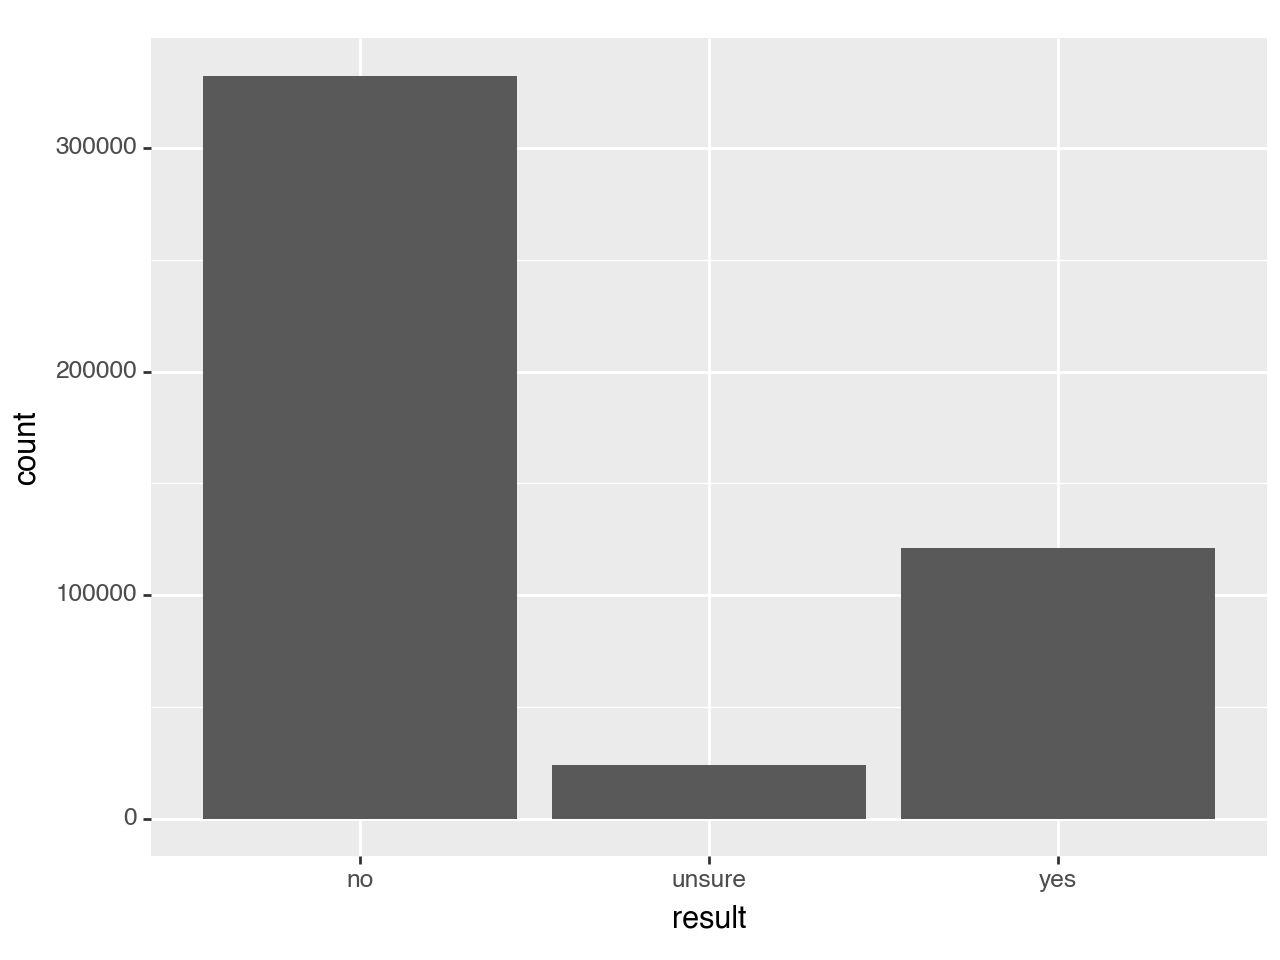

<Figure Size: (640 x 480)>

In [9]:
(ggplot(results, aes(x = "result")) + geom_bar())

In [57]:
results.groupby(["year"])["result"].value_counts()

year  result
2013  yes         1250
      no           366
      unsure        56
2014  no         59936
      yes        18070
      unsure      3443
2015  no          4853
      yes         1583
      unsure       225
2016  no        202922
      yes        73216
      unsure     14632
2017  no         36088
      yes        11023
      unsure      2723
2018  no          1989
      yes          167
      unsure        73
2019  no         16510
      yes         6210
      unsure      1608
2020  no          1683
      yes          948
      unsure       134
2021  no          2511
      yes         1776
      unsure       350
2022  no          4006
      yes         3464
      unsure       537
2023  yes         3630
      no          1387
      unsure       539
Name: result, dtype: int64

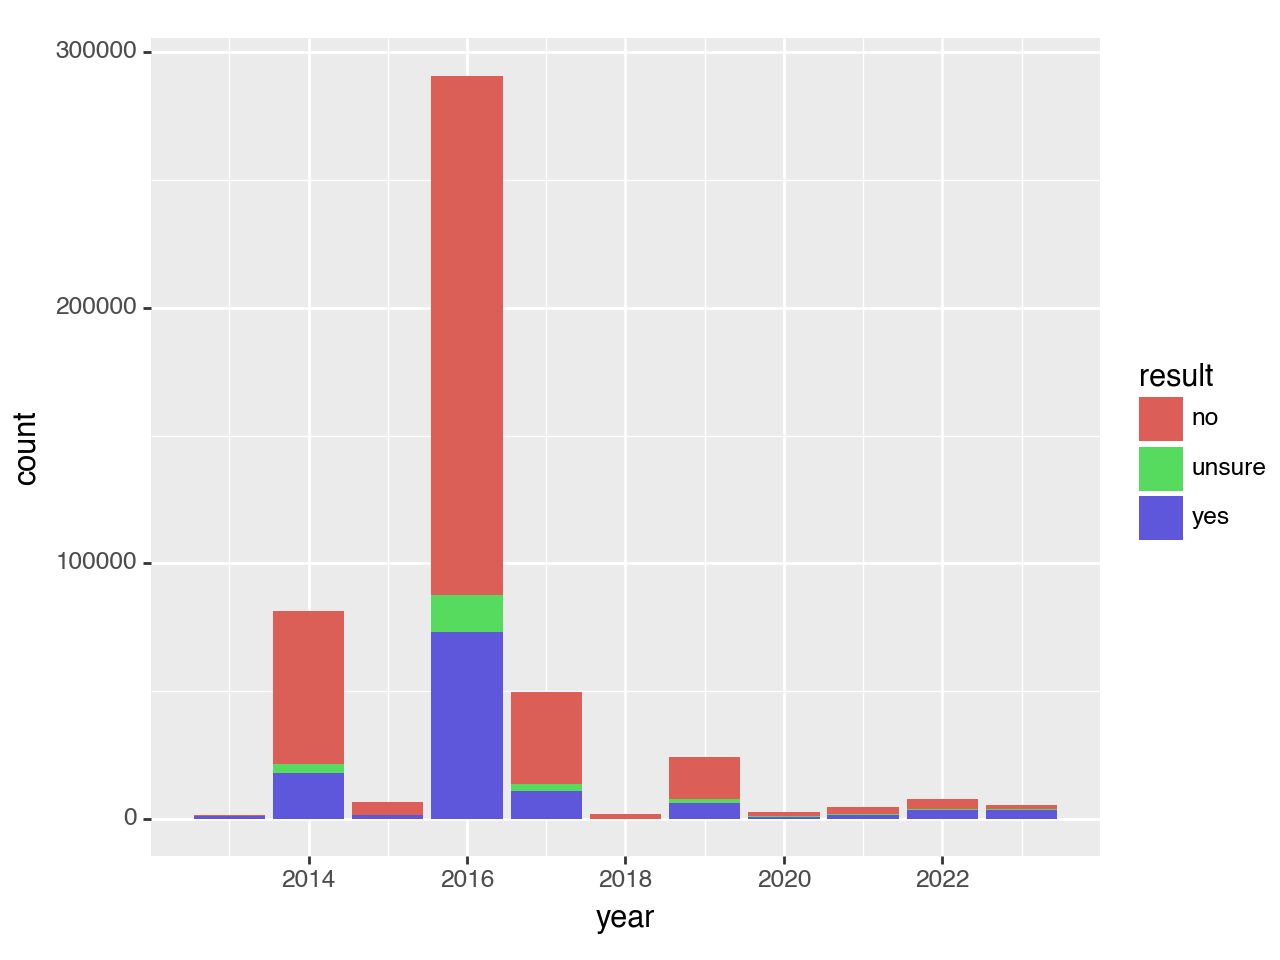

<Figure Size: (640 x 480)>

In [10]:
(ggplot(results, aes(x = "year", fill = "result")) + geom_bar())

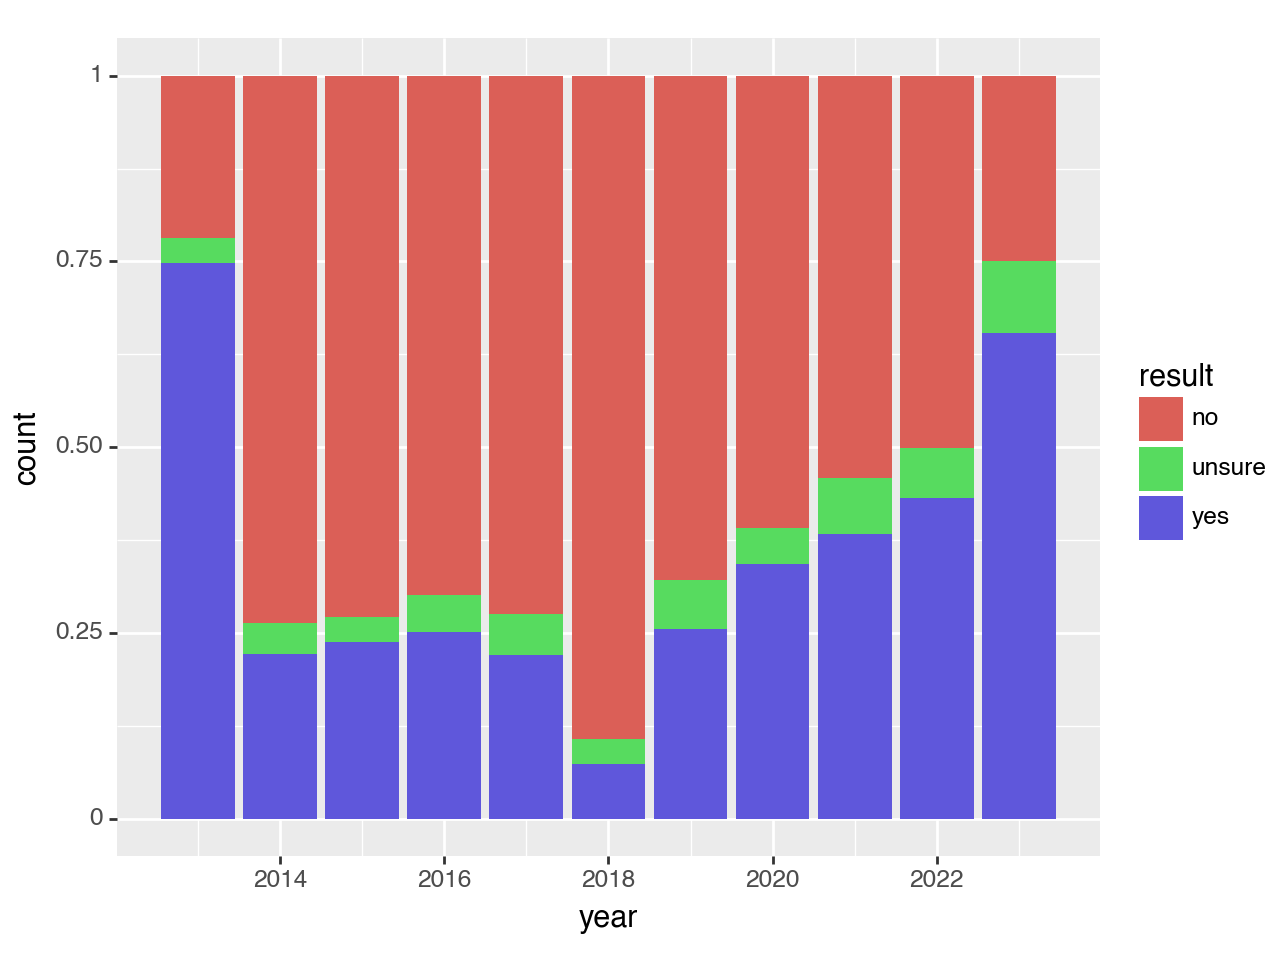

<Figure Size: (640 x 480)>

In [11]:
(ggplot(results, aes(x = "year", fill = "result")) + geom_bar(position = "fill"))

In [18]:
gdf["geometry"] = gdf.centroid

# Define the H3 resolution
h3_resolution = 5  # Adjust as needed (higher value = smaller hexagons)

# Function to convert lat/lon to a hexagon
def latlon_to_hexagon(row, resolution):
    return h3.geo_to_h3(row.geometry.y, row.geometry.x, resolution)

# Assign each point to a hexagon
gdf['hexagon'] = gdf.apply(latlon_to_hexagon, resolution=h3_resolution, axis=1)

# Aggregate data by hexagon
hexagon_gdf = gdf.groupby('hexagon').size().reset_index(name='count')

# Function to generate hexagon geometry
def hexagon_to_geometry(hexagon):
    vertices = h3.h3_to_geo_boundary(hexagon, geo_json=True)
    return Polygon(vertices)

# Create hexagon geometries
hexagon_gdf['geometry'] = hexagon_gdf['hexagon'].apply(hexagon_to_geometry)

# Convert to a GeoDataFrame
hexagon_gdf = gpd.GeoDataFrame(hexagon_gdf, geometry='geometry')

# Create a folium map
m = folium.Map(location=[gdf.geometry.y.mean(), gdf.geometry.x.mean()], zoom_start=12)

# Add hexagons to the map
for _, row in hexagon_gdf.iterrows():
    folium.GeoJson(data=row['geometry'],
                   tooltip=f'Count: {row["count"]}'
                  ).add_to(m)

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_31356/216930495.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



In [20]:
hexagon_gdf

,hexagon,count,geometry
0,85545a4bfffffff,326,"POLYGON ((-11.02369 9.64298, -11.08287 9.58189..."
1,85545a4ffffffff,311,"POLYGON ((-10.91781 9.55959, -10.97695 9.49861..."
2,85545a53fffffff,1018,"POLYGON ((-10.84585 9.82638, -10.90518 9.76522..."
3,85545a67fffffff,441,"POLYGON ((-10.60191 9.31037, -10.66095 9.24972..."
4,85545a7bfffffff,136,"POLYGON ((-10.81222 9.47636, -10.87133 9.41549..."
...,...,...,...
69,8575b553fffffff,1216,"POLYGON ((-10.36619 8.32636, -10.42461 8.26660..."
70,8575b557fffffff,350,"POLYGON ((-10.26307 8.24548, -10.32145 8.18582..."
71,8575b55bfffffff,736,"POLYGON ((-10.50549 8.27715, -10.56385 8.21736..."
72,8575b5bbfffffff,307,"POLYGON ((-9.74361 8.31154, -9.80212 8.25204, ..."
